In [4]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from datetime import datetime

In [5]:
# get path of all .csv files (history from API crawling)
all_files = glob.glob(os.path.join(os.path.dirname(os.path.abspath('')),"raw_data", "preproc_data" , "*.csv"))

In [6]:
# get only the filename (== timestamp) and convert to datetime
timestamps = []
for file in all_files:
    timestamps.append(datetime.fromtimestamp(int(file[-14:-4])))

In [7]:
timestamps[0]

datetime.datetime(2022, 6, 26, 22, 55, 58)

In [8]:
timestamps_df = pd.DataFrame(timestamps, columns=["Date"])

In [9]:
daily_timestamps = timestamps_df.groupby(pd.Grouper(key='Date', freq='D'))[["Date"]].count()

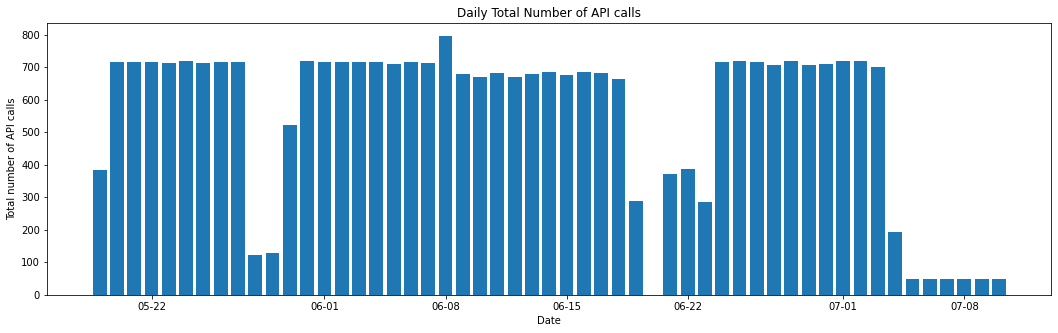

In [10]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(18, 5))

# Add x-axis and y-axis
ax.bar(daily_timestamps.index.values,
       daily_timestamps['Date'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total number of API calls",
       title="Daily Total Number of API calls")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()